# Analisi esplorativa del training set

Questo notebook presenta l'analisi esplorativa del training set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing

# %matplotlib inline

# tune this for bigger figures
pl.rcParams['figure.figsize'] = (14, 14)

Carichiamo il dataset:

In [2]:
dataset_raw = pd.read_excel("./Dataset/finali/integrato_2014.xlsx", sheet_name='ML_finale')
dataset_raw.head()

,Country code,Country name,Population,CO2 production (kg),Charcoal consumption (kg),Fuel oil consumption (kg),Renewable energy consumption (percentage),PM2.5 (micrograms),GDP
0,AFG,Afghanistan,32758020,9.809225e+09,1.259260e+08,4.407000e+08,16.748996,49.026761,2.005019e+10
1,AGO,Angola,26920466,3.476316e+10,1.164000e+09,3.081000e+03,50.797466,35.129513,1.267770e+11
2,AND,Andorra,79223,4.620420e+08,2.900000e+04,1.299600e+02,19.886327,10.389338,3.350736e+09
3,ARE,United Arab Emirates,9070867,2.113695e+11,6.400000e+07,4.957000e+03,0.167807,67.175459,4.031980e+11
4,ARG,Argentina,42981515,2.040245e+11,4.940000e+08,9.759000e+03,10.773125,13.678616,5.263200e+11


Normalizziamo gli attributi rispetto alla popolazione:

In [3]:
def normalize_with_col(dataset, norm_col_name, cols_to_normalize):
    """Divide all columns in a dataset for the normalization column."""
    norm_col = dataset[norm_col_name]
    result = dataset.copy()
    
    for col in cols_to_normalize:
        result[col] = result[col] / norm_col
    
    return result

In [4]:
dataset = normalize_with_col(dataset_raw, 'Population', ['CO2 production (kg)',
                                                       'Charcoal consumption (kg)',
                                                       'Fuel oil consumption (kg)',
                                                       'GDP',
                                                       'PM2.5 (micrograms)'])
dataset_gdp = normalize_with_col(dataset_raw, 'GDP', ['CO2 production (kg)',
                                                    'Charcoal consumption (kg)',
                                                    'Fuel oil consumption (kg)',
                                                    'PM2.5 (micrograms)'])

In [5]:
dataset.head()

,Country code,Country name,Population,CO2 production (kg),Charcoal consumption (kg),Fuel oil consumption (kg),Renewable energy consumption (percentage),PM2.5 (micrograms),GDP
0,AFG,Afghanistan,32758020,299.444991,3.844127,13.453194,16.748996,1.496634e-06,612.069651
1,AGO,Angola,26920466,1291.328315,43.238479,0.000114,50.797466,1.304937e-06,4709.316696
2,AND,Andorra,79223,5832.169951,0.366055,0.001640,19.886327,1.311404e-04,42294.994724
3,ARE,United Arab Emirates,9070867,23302.022508,7.055555,0.000546,0.167807,7.405627e-06,44449.775308
4,ARG,Argentina,42981515,4746.797455,11.493313,0.000227,10.773125,3.182442e-07,12245.264040


In [6]:
dataset_gdp.head()

,Country code,Country name,Population,CO2 production (kg),Charcoal consumption (kg),Fuel oil consumption (kg),Renewable energy consumption (percentage),PM2.5 (micrograms),GDP
0,AFG,Afghanistan,32758020,0.489234,0.006281,2.197984e-02,16.748996,2.445202e-09,2.005019e+10
1,AGO,Angola,26920466,0.274207,0.009181,2.430252e-08,50.797466,2.770969e-10,1.267770e+11
2,AND,Andorra,79223,0.137893,0.000009,3.878550e-08,19.886327,3.100613e-09,3.350736e+09
3,ARE,United Arab Emirates,9070867,0.524233,0.000159,1.229421e-08,0.167807,1.666066e-10,4.031980e+11
4,ARG,Argentina,42981515,0.387644,0.000939,1.854195e-08,10.773125,2.598916e-11,5.263200e+11


## Statistiche descrittive per il dataset scalato

Il dataset contiene 153 istanze di paesi, ognuna con gli attributi

- popolazione
- produzione di CO_2 annuale (in kg)
- consumo di carbone annuale (in kg)
- consumo di carburanti fossili annuale (in kg)
- percentuale di energia rinnovabile utilizzata, rispetto all'utilizzo totale di quel paese
- GDP (prodotto interno lordo)

Vediamo come sono distribuite le variabili.

In [7]:
dataset.describe()

,Population,CO2 production (kg),Charcoal consumption (kg),Fuel oil consumption (kg),Renewable energy consumption (percentage),PM2.5 (micrograms),GDP
count,1.530000e+02,153.000000,153.000000,1.530000e+02,153.000000,1.530000e+02,153.000000
mean,4.388212e+07,4190.103188,17.168798,8.814228e-02,35.687487,1.381002e-05,11756.843728
std,1.560372e+08,6372.361344,25.588456,1.087609e+00,29.876964,2.880287e-05,16910.303310
min,7.277800e+04,44.485376,0.008927,5.180149e-07,0.000000,2.667771e-08,312.748979
25%,2.374419e+06,564.368357,1.077500,4.436075e-05,9.798903,1.080449e-06,1569.928275
50%,9.474511e+06,1902.758910,3.325575,1.342412e-04,28.721289,2.937157e-06,4712.822736
75%,2.832324e+07,5260.352041,29.347377,2.915885e-04,59.903202,1.068541e-05,14201.434596
max,1.364270e+09,45423.239959,138.779013,1.345319e+01,93.859219,1.884716e-04,97200.009655


In [8]:
dataset_gdp.describe()

,Population,CO2 production (kg),Charcoal consumption (kg),Fuel oil consumption (kg),Renewable energy consumption (percentage),PM2.5 (micrograms),GDP
count,1.530000e+02,153.000000,153.000000,1.530000e+02,153.000000,1.530000e+02,1.530000e+02
mean,4.388212e+07,0.425619,0.017265,1.436859e-04,35.687487,4.163394e-09,4.315863e+11
std,1.560372e+08,0.316465,0.036338,1.776963e-03,29.876964,9.026416e-09,1.738126e+12
min,7.277800e+04,0.052415,0.000002,7.398244e-10,0.000000,4.886157e-13,1.788693e+08
25%,2.374419e+06,0.218301,0.000076,1.593321e-08,9.798903,1.566275e-10,8.791354e+09
50%,9.474511e+06,0.312247,0.000615,2.525042e-08,28.721289,8.014084e-10,3.338771e+10
75%,2.832324e+07,0.525086,0.010451,3.477765e-08,59.903202,3.542621e-09,2.062250e+11
max,1.364270e+09,1.767801,0.210236,2.197984e-02,93.859219,7.139046e-08,1.739310e+13


Ora vediamo la distribuzione delle features:

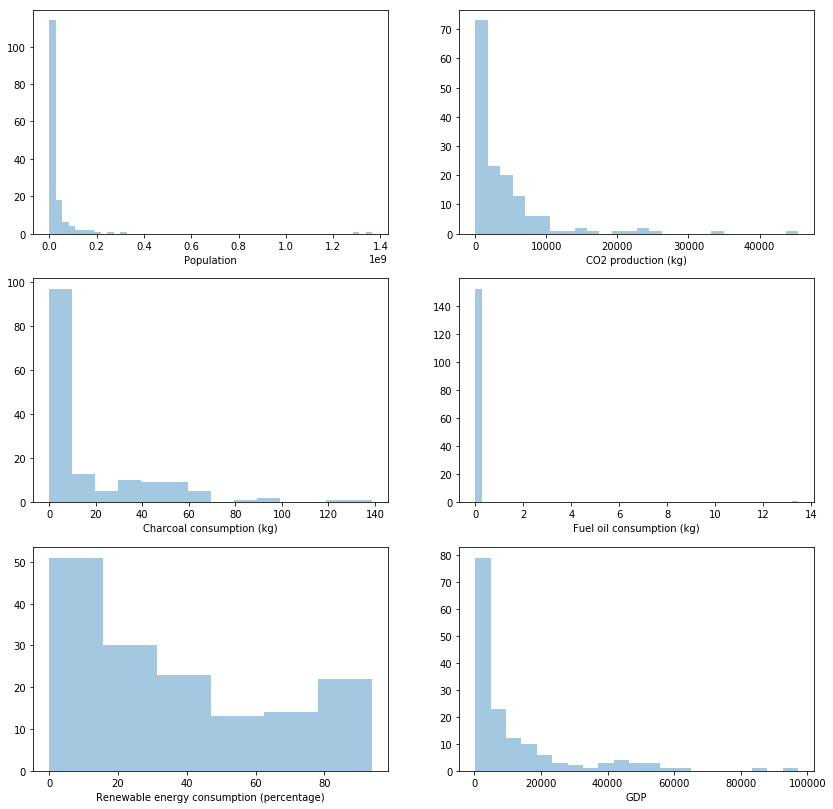

In [9]:
# Plot the population-scaled dataset
fig, ax = pl.subplots(3, 2, figsize=(14, 14))

sns.distplot(dataset['Population'], ax=ax[0, 0], kde=False)
sns.distplot(dataset['CO2 production (kg)'], ax=ax[0, 1], kde=False)
sns.distplot(dataset['Charcoal consumption (kg)'], ax=ax[1, 0], kde=False)
sns.distplot(dataset['Fuel oil consumption (kg)'], ax=ax[1, 1], kde=False)
sns.distplot(dataset['Renewable energy consumption (percentage)'], ax=ax[2, 0], kde=False)
sns.distplot(dataset['GDP'], ax=ax[2, 1], kde=False)
pl.show()

fig.savefig('Scalato con popolazione.pdf', bbox_inches='tight')

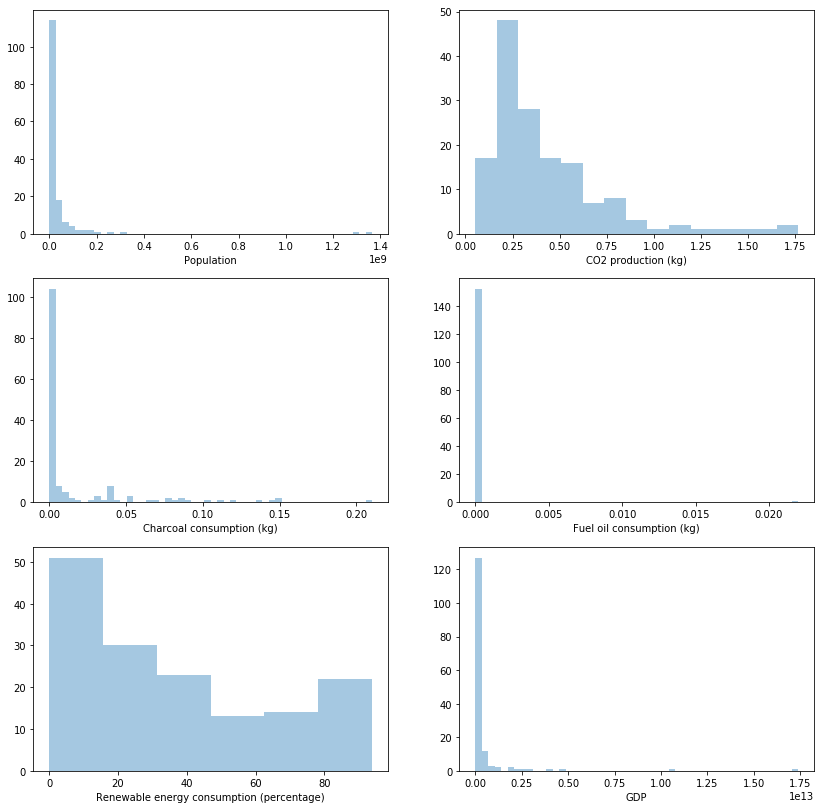

In [10]:
# Plot the GDP-scaled dataset
fig, ax = pl.subplots(3, 2, figsize=(14, 14))

sns.distplot(dataset_gdp['Population'], ax=ax[0, 0], kde=False)
sns.distplot(dataset_gdp['CO2 production (kg)'], ax=ax[0, 1], kde=False)
sns.distplot(dataset_gdp['Charcoal consumption (kg)'], ax=ax[1, 0], kde=False)
sns.distplot(dataset_gdp['Fuel oil consumption (kg)'], ax=ax[1, 1], kde=False)
sns.distplot(dataset_gdp['Renewable energy consumption (percentage)'], ax=ax[2, 0], kde=False)
sns.distplot(dataset_gdp['GDP'], ax=ax[2, 1], kde=False)
pl.show()

fig.savefig('Scalato con GDP.pdf', bbox_inches='tight')

In [11]:
def standardize(dataset, cols):
    """Standardize dataset."""
    result = dataset.copy()
    for col in cols:
        vals = preprocessing.scale(dataset[col].values)
        result.loc[:, col] = vals

    return result

In [12]:
dataset_std = standardize(dataset,
                           ['Population',
                            'CO2 production (kg)',
                            'Charcoal consumption (kg)',
                            'Fuel oil consumption (kg)',
                            'Renewable energy consumption (percentage)',
                            'GDP'])

dataset_std_gdp = standardize(dataset_gdp,
                             ['Population',
                             'CO2 production (kg)',
                             'Charcoal consumption (kg)',
                             'Fuel oil consumption (kg)',
                             'Renewable energy consumption (percentage)',
                             'GDP'])

/Users/pietro/Documents/Universita/Progetto_DT_ML/.venv/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/pietro/Documents/Universita/Progetto_DT_ML/.venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


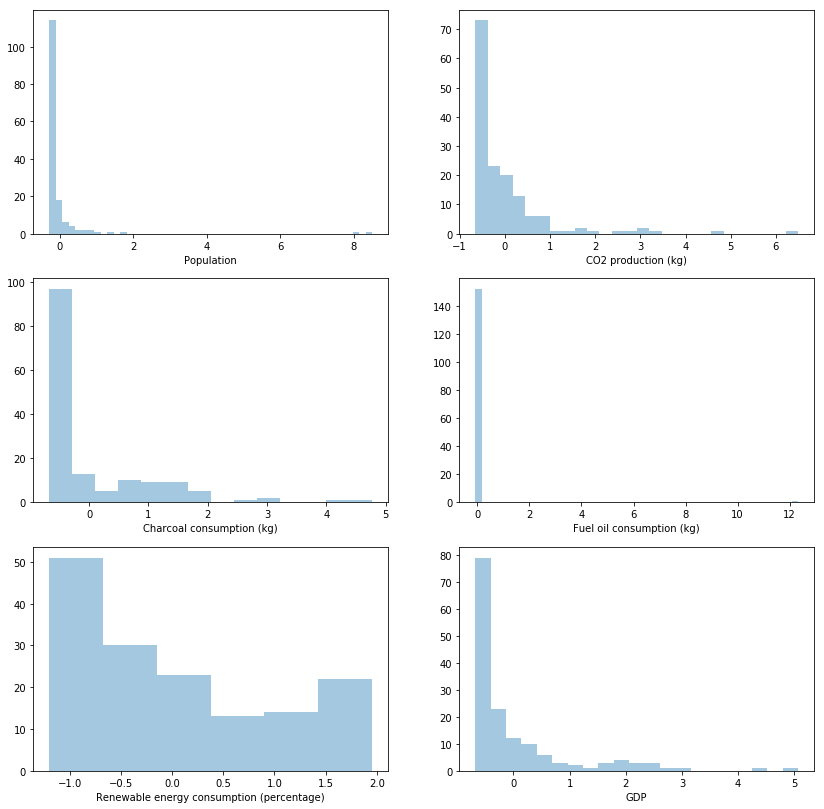

In [13]:
# Plot the standardized population-scaled dataset
fig, ax = pl.subplots(3, 2, figsize=(14, 14))

sns.distplot(dataset_std['Population'], ax=ax[0, 0], kde=False)
sns.distplot(dataset_std['CO2 production (kg)'], ax=ax[0, 1], kde=False)
sns.distplot(dataset_std['Charcoal consumption (kg)'], ax=ax[1, 0], kde=False)
sns.distplot(dataset_std['Fuel oil consumption (kg)'], ax=ax[1, 1], kde=False)
sns.distplot(dataset_std['Renewable energy consumption (percentage)'], ax=ax[2, 0], kde=False)
sns.distplot(dataset_std['GDP'], ax=ax[2, 1], kde=False)

pl.show()

fig.savefig('STD-Scalato con popolazione.pdf', bbox_inches='tight')

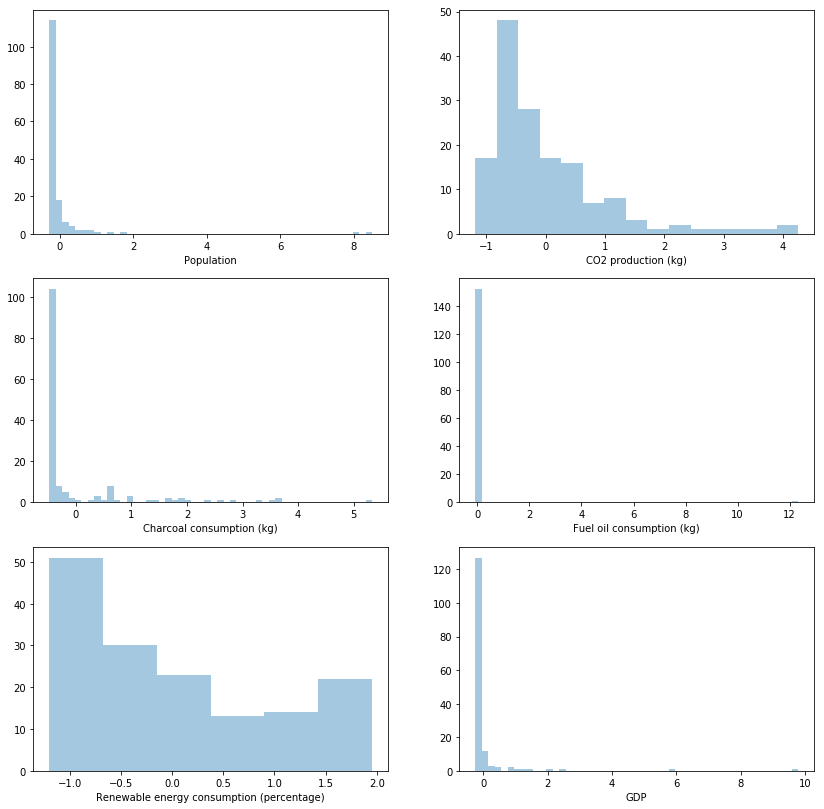

In [14]:
# Plot the standardized GDP-scaled dataset
fig, ax = pl.subplots(3, 2, figsize=(14, 14))

sns.distplot(dataset_std_gdp['Population'], ax=ax[0, 0], kde=False)
sns.distplot(dataset_std_gdp['CO2 production (kg)'], ax=ax[0, 1], kde=False)
sns.distplot(dataset_std_gdp['Charcoal consumption (kg)'], ax=ax[1, 0], kde=False)
sns.distplot(dataset_std_gdp['Fuel oil consumption (kg)'], ax=ax[1, 1], kde=False)
sns.distplot(dataset_std_gdp['Renewable energy consumption (percentage)'], ax=ax[2, 0], kde=False)
sns.distplot(dataset_std_gdp['GDP'], ax=ax[2, 1], kde=False)

pl.show()

fig.savefig('STD-Scalato con GDP.pdf', bbox_inches='tight')

## Correlazione tra features

Esploriamo la correlazione tra le features con una heatmap:

In [15]:
def create_heatmap(dataset, figsize=(14, 14)):
    """Create a heatmap from the dataset."""
    # Compute the correlation matrix
    corr = dataset.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = pl.subplots(figsize=figsize)
    
    # Generate a custom diverging colormap
    cmap = sns.color_palette("RdBu")
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, center=0, cmap=cmap, annot=True,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

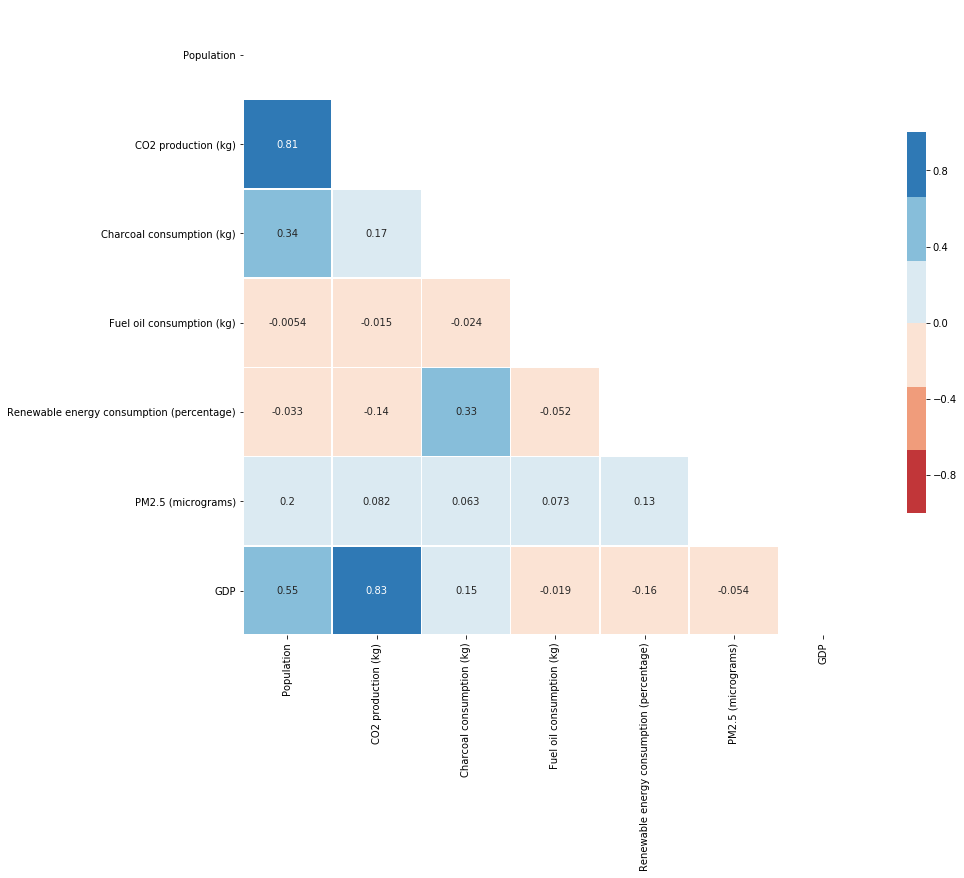

In [16]:
create_heatmap(dataset_raw)

# K-Means con Scikit-Learn

TO BE DONE

## Analisi PCA per la varianza spiegata

Vediamo il contributo di ogni feature alla varianza spiegata dei dati:

In [18]:
pca = PCA(n_components=None)
X_pca = pca.fit_transform(dataset_std.loc[:,['CO2 production (kg)',
                                        'Charcoal consumption (kg)',
                                        'Fuel oil consumption (kg)',
                                        'Renewable energy consumption (percentage)']])
pca.explained_variance_ratio_

array([0.49006795, 0.25403413, 0.17276042, 0.0831375 ])

In [19]:
def plot_explained_variance(pca_obj, threshold=0.9):
    n = len(pca_obj.explained_variance_ratio_)
    x_vals = np.arange(n)
    
    # bar chart
    pl.bar(x_vals,
           pca_obj.explained_variance_ratio_,
           alpha=0.5,
           align="center",
           label="Single feature explained variance")
    
    # step plot
    pl.step(x_vals,
            np.cumsum(pca_obj.explained_variance_ratio_),
            where="mid",
            label="Cumulative explained variance")
    
    # threshold
    pl.plot(x_vals,
           threshold * np.ones(x_vals.shape),
           linestyle='--',
           label="{}% threshold".format(threshold * 100))
    
    pl.xlabel("Principal components")
    pl.ylabel("Explained variance ratio")
    pl.legend(loc="center right")
    pl.show()

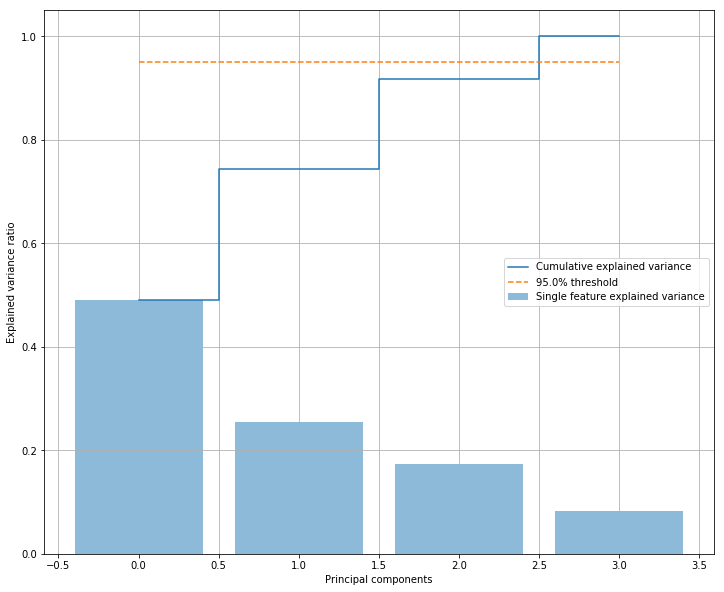

In [20]:
fig, ax = pl.subplots(ncols=1, figsize=(12, 10))
pl.grid(True)
plot_explained_variance(pca, threshold=0.95)